# Credit EDA Case Study

### Importing All required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_rows', 200) 
pd.set_option('display.width', 800)

### Loading the Application data set and Previous application dataset 

In [2]:
CurrentApplication = pd.read_csv(r'C:\Users\assa1016\Desktop\PG\EDA Case studay\application_data.csv')
PreviousApplication = pd.read_csv(r'C:\Users\assa1016\Desktop\PG\EDA Case studay\previous_application.csv')

#### Walkthrough Application Dataset

In [3]:
CurrentApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
CurrentApplication.shape

(307511, 122)

In [5]:
CurrentApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
CurrentApplication.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Checking for NULL Values in Current Application 

In [7]:
CurrentApplication.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Finding the percentage of missing values in all columns

round(CurrentApplication.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values

In [9]:

CurrentApplication = CurrentApplication.loc[:,CurrentApplication.isnull().mean()<=0.5]
CurrentApplication.shape

(307511, 81)

### Selecting columns with less or equal to than 10% null vallues

In [10]:
list(CurrentApplication.columns[(CurrentApplication.isnull().mean()<=0.10) & (CurrentApplication.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

### Checking the Outlier and Imputing columns with possible solutions

In [11]:
CurrentApplication['REGION_RATING_CLIENT'].value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

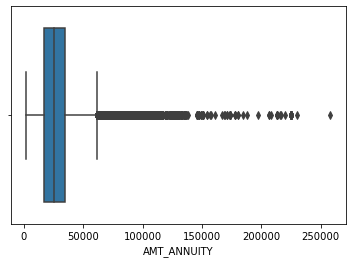

In [12]:
sns.boxplot(CurrentApplication['AMT_ANNUITY'])
plt.show()

In [13]:
AMT_ANNUITY_median = CurrentApplication.AMT_ANNUITY.median()

In [14]:
CurrentApplication['AMT_ANNUITY'].fillna(AMT_ANNUITY_median, inplace = True)

In [15]:
CurrentApplication['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

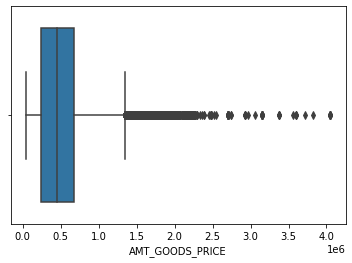

In [16]:
sns.boxplot(CurrentApplication['AMT_GOODS_PRICE'])
plt.show()

In [17]:
AMT_GOODS_PRICE_median = CurrentApplication.AMT_GOODS_PRICE.median()
CurrentApplication['AMT_GOODS_PRICE'].fillna(AMT_GOODS_PRICE_median, inplace = True)

In [18]:
CurrentApplication['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [19]:
CurrentApplication['NAME_TYPE_SUITE'].fillna(CurrentApplication['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [20]:
CurrentApplication['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

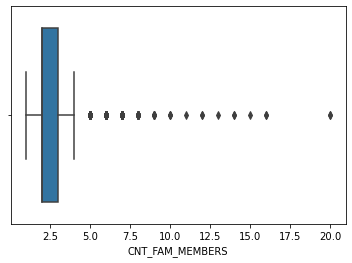

In [21]:
sns.boxplot(CurrentApplication['CNT_FAM_MEMBERS'])
plt.show()

In [22]:
CNT_FAM_MEMBERS_median = CurrentApplication.CNT_FAM_MEMBERS.median()
CurrentApplication['CNT_FAM_MEMBERS'].fillna(CNT_FAM_MEMBERS_median, inplace = True)

### We are considering first 30 columns from CurrentApplication for Analysis

In [23]:
Analysis_df = CurrentApplication.iloc[:,:30]

In [24]:
Analysis_df.shape

(307511, 30)

In [25]:
list(Analysis_df.columns[(Analysis_df.isnull().mean()<=0.10) & (Analysis_df.isnull().mean()>0)])

[]

Categorising Age into two types AGE_GROUP(NUMERICAL),AGE_SLOT(AGE CATEGORY)

In [26]:
Analysis_df['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [27]:
Analysis_df['AGE']=abs(Analysis_df['DAYS_BIRTH'])//365.25
Analysis_df['AGE_GROUP'] = pd.cut(Analysis_df['AGE'],bins=np.arange(20,81,15))


In [28]:
def AGE(x):
    'divide he age into four categories'
    if 18<= x <=30:
        return "Young"
    elif 30<= x <= 45:
        return "Mid-Aged"
    else:
        return "Senior"
    
Analysis_df['AGE_SLOT'] = Analysis_df.AGE.apply(lambda x: AGE(x))
        

In [29]:
Analysis_df['ANNUAL_INCOME_TOTAL_GRP'] = pd.cut(Analysis_df['AMT_INCOME_TOTAL'],bins=np.arange(25000,2725001,500000))

In [30]:
Analysis_df['ANNUAL_INCOME_TOTAL_GRP'].value_counts()

(25000, 525000]       304865
(525000, 1025000]       2399
(1025000, 1525000]       163
(1525000, 2025000]        48
(2025000, 2525000]        17
Name: ANNUAL_INCOME_TOTAL_GRP, dtype: int64

Categorize AMT_INCOME_TOTAL into 5 types:

In [31]:
Analysis_df['INCOME_GROUP']=pd.qcut(Analysis_df['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],
 labels=['VeryLow','Low','Medium','High','VeryHigh']) 

In [32]:
Analysis_df["INCOME_VS_ANNUITY"] = Analysis_df['AMT_INCOME_TOTAL']<= Analysis_df['AMT_ANNUITY']

In [33]:
Analysis_df["INCOME_VS_ANNUITY"] = Analysis_df["INCOME_VS_ANNUITY"] + 1

In [34]:
Analysis_df[(Analysis_df["INCOME_VS_ANNUITY"]==2) & (Analysis_df['TARGET']==1)]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AGE,AGE_GROUP,AGE_SLOT,ANNUAL_INCOME_TOTAL_GRP,INCOME_GROUP,INCOME_VS_ANNUITY
678,100784,1,Cash loans,Female,N,Y,0,54000.0,1885500.0,74191.5,1885500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,-22181,365243,-14266.0,-4714,1,0,0,1,0,0,NaN,2.0,2,60,"(50, 65]",Senior,"(25000, 525000]",VeryLow,2
20727,124157,1,Cash loans,Female,Y,Y,0,25650.0,2173500.0,48118.5,2173500.0,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.035792,-21517,365243,-1669.0,-4962,1,0,0,1,0,0,NaN,2.0,2,58,"(50, 65]",Senior,"(25000, 525000]",VeryLow,2
122480,242003,1,Cash loans,Female,N,N,0,54000.0,497520.0,59175.0,450000.0,Family,Working,Incomplete higher,Married,With parents,0.003069,-11220,-1175,-4739.0,-2461,1,1,0,1,0,0,Core staff,2.0,3,30,"(20, 35]",Young,"(25000, 525000]",VeryLow,2
205575,338291,1,Cash loans,Female,N,N,0,36000.0,1223010.0,48627.0,1125000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.035792,-23020,365243,-10800.0,-4958,1,0,0,1,0,0,NaN,2.0,2,63,"(50, 65]",Senior,"(25000, 525000]",VeryLow,2
226137,361920,1,Cash loans,Female,N,Y,0,45000.0,1800000.0,62698.5,1800000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.026392,-23681,365243,-3102.0,-4685,1,0,0,1,0,0,NaN,2.0,2,64,"(50, 65]",Senior,"(25000, 525000]",VeryLow,2


In [35]:
Analysis_df["INCOME_VS_ANNUITY"].value_counts()

1    307477
2        34
Name: INCOME_VS_ANNUITY, dtype: int64

As we know INCOME_VS_ANNUITY column contains the 1 and 2 value, which states 1 shows Annual income is greater than Loan Annuity.
From this value count value we can see 34 of them having anual income less than loan annuity.
We can reject that 34 from the table if we consider AMT_INCOME_TOTAL as annual income.

In [36]:
Analysis_df['CREDIT_INCOME_RATIO']=round((Analysis_df['AMT_CREDIT']/Analysis_df['AMT_INCOME_TOTAL']))

In [37]:
Analysis_df['CODE_GENDER'].value_counts()

Female    202448
Male      105059
XNA            4
Name: CODE_GENDER, dtype: int64

We can see one mismatched value in GENDER 'XNA'. removed all the rows which contains XNA

In [38]:
Analysis_df = Analysis_df[Analysis_df['CODE_GENDER']!='XNA']

#### Dividing Analysis_df into two based on the target value(0 and 1): 0 means Non-Defaulters, 1 means Defaulters(who missed pay back one or more time)

##### Analysis_df1 : Defaulters(Target value = 1)
##### Analysis_df0 : Non-Defaulters ( Target value = 0) 

In [39]:
Analysis_df0 = Analysis_df[Analysis_df['TARGET']==0]

In [40]:
Analysis_df1 = Analysis_df[Analysis_df['TARGET']==1]

In [41]:
Analysis_df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AGE,AGE_GROUP,AGE_SLOT,ANNUAL_INCOME_TOTAL_GRP,INCOME_GROUP,INCOME_VS_ANNUITY,CREDIT_INCOME_RATIO
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,45,"(35, 50]",Mid-Aged,"(25000, 525000]",VeryHigh,1,5.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,52,"(50, 65]",Senior,"(25000, 525000]",VeryLow,1,2.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,52,"(50, 65]",Senior,"(25000, 525000]",Medium,1,2.0
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,54,"(50, 65]",Senior,"(25000, 525000]",Medium,1,4.0
5,100008,0,Cash loans,Male,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,46,"(35, 50]",Senior,"(25000, 525000]",Low,1,5.0


In [42]:
#Analysis_df0['CODE_GENDER'].value_counts()

#We can see one mismatched value in GENDER 'XNA'. removed all the rows which contains XNA

In [43]:
#Analysis_df0 = Analysis_df0[Analysis_df0['CODE_GENDER']!='XNA']

## Find out the imbalance in Target column

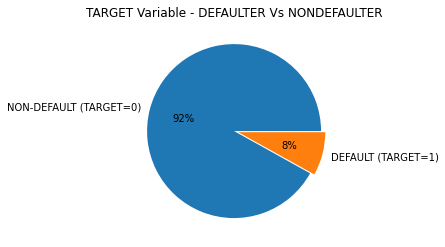

In [44]:
plt.pie(CurrentApplication['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

We can see that there is an imbalance between people who defaulted and who didn't default. 
92% of people didn't default and 8% who defaulted.

## Univariate Categorical Analysis in Application Dataset

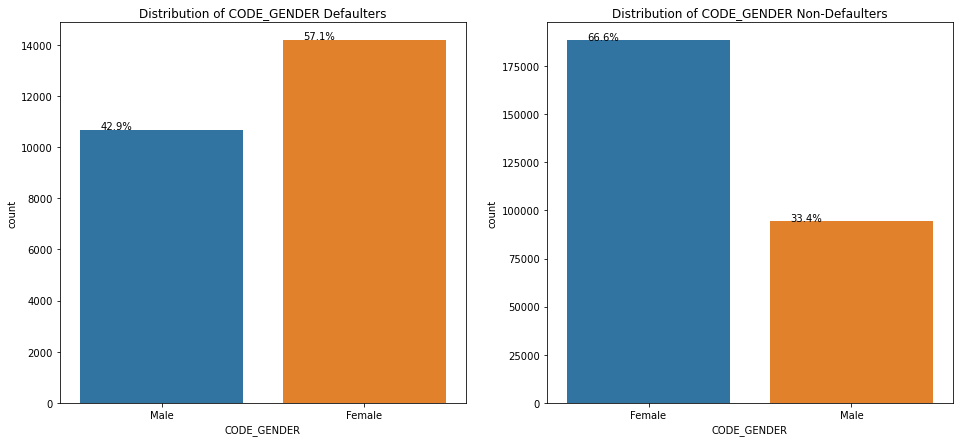

In [45]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Distribution of CODE_GENDER Defaulters')
TARGET_GENDER_DEFAULTERS = sns.countplot(x='CODE_GENDER',data=Analysis_df1)
for p in TARGET_GENDER_DEFAULTERS.patches:
   TARGET_GENDER_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of CODE_GENDER Non-Defaulters')
TARGET_GENDER_NDEFAULTERS = sns.countplot(x='CODE_GENDER',data=Analysis_df0)
for p in TARGET_GENDER_NDEFAULTERS.patches:
   TARGET_GENDER_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

We can see that 57% Female defaulters, while 67% to the non-defaulters. 
We can say that
female applying for loans more than males and hence the more number of female defaulters as well.


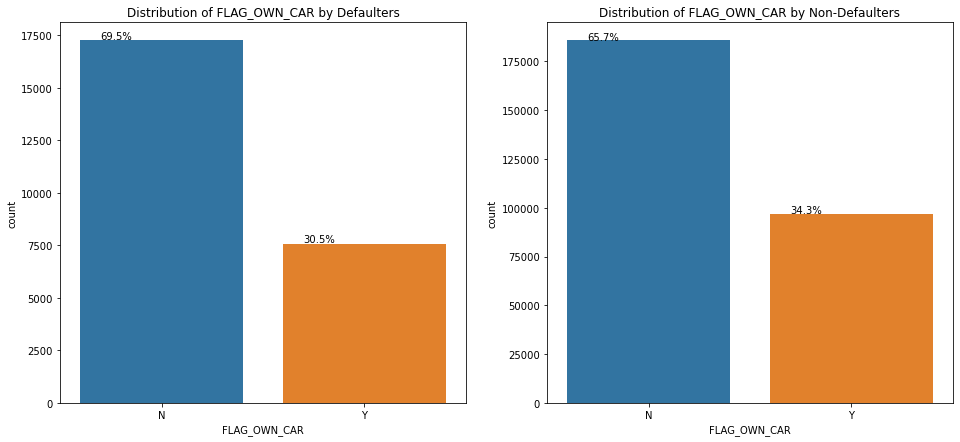

In [46]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Distribution of FLAG_OWN_CAR by Defaulters')
TARGET_FLAG_OWN_CAR_DEFAULTERS= sns.countplot(x='FLAG_OWN_CAR',data=Analysis_df1)
for p in TARGET_FLAG_OWN_CAR_DEFAULTERS.patches:
   TARGET_FLAG_OWN_CAR_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of FLAG_OWN_CAR by Non-Defaulters')
TARGET_FLAG_OWN_CAR_NDEFAULTERS = sns.countplot(x='FLAG_OWN_CAR',data=Analysis_df0)
for p in TARGET_FLAG_OWN_CAR_NDEFAULTERS.patches:
   TARGET_FLAG_OWN_CAR_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Having a car will not help to find out the Defaulters and non-defaulters. Both have equal percentage of value that having a car and not having a car.

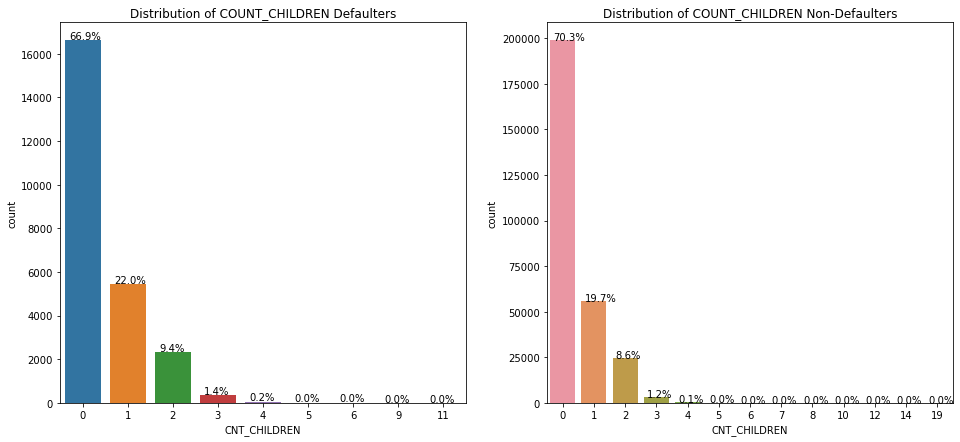

In [47]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Distribution of COUNT_CHILDREN Defaulters')
TARGET_CNT_CHILDREN_DEFAULTERS = sns.countplot(x='CNT_CHILDREN',data=Analysis_df1)
for p in TARGET_CNT_CHILDREN_DEFAULTERS.patches:
   TARGET_CNT_CHILDREN_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of COUNT_CHILDREN Non-Defaulters')
TARGET_CNT_CHILDREN_NDEFAULTERS = sns.countplot(x='CNT_CHILDREN',data=Analysis_df0)
for p in TARGET_CNT_CHILDREN_NDEFAULTERS.patches:
   TARGET_CNT_CHILDREN_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Inference:
Points to be concluded from the above graph:
1. We can see that low child count maximizes that chances of both being a defaulter and also non defaulter. So we cannot conclude any specifics from this exploration.

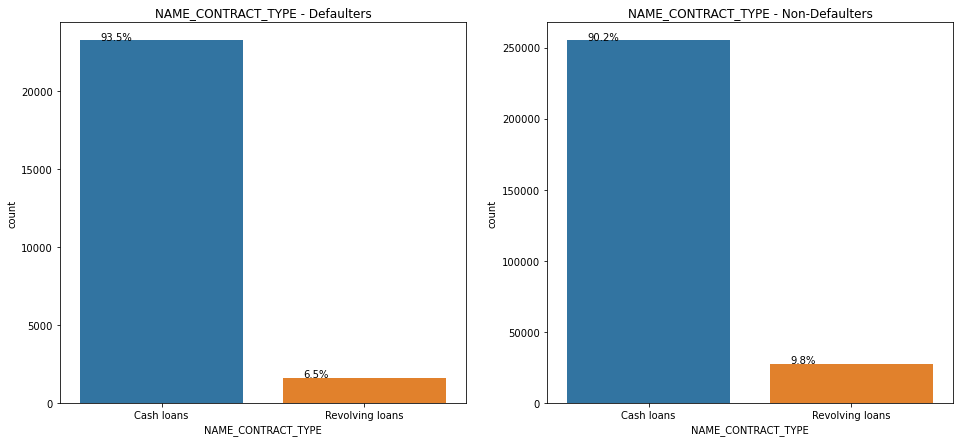

In [48]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('NAME_CONTRACT_TYPE - Defaulters')
TARGET_NAME_CONTRACT_TYPE_DEFAULTERS= sns.countplot(x='NAME_CONTRACT_TYPE',data=Analysis_df1)
for p in TARGET_NAME_CONTRACT_TYPE_DEFAULTERS.patches:
   TARGET_NAME_CONTRACT_TYPE_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('NAME_CONTRACT_TYPE - Non-Defaulters')
TARGET_NAME_CONTRACT_TYPE_NDEFAULTERS = sns.countplot(x='NAME_CONTRACT_TYPE',data=Analysis_df0)
for p in TARGET_NAME_CONTRACT_TYPE_NDEFAULTERS.patches:
   TARGET_NAME_CONTRACT_TYPE_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

In both Defaulters and Non-defaulters maximum people have applied for Cash loans.

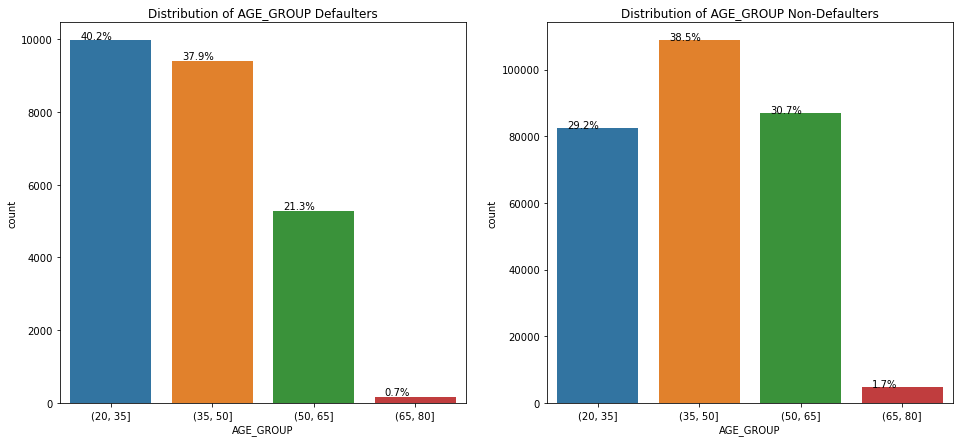

In [49]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Distribution of AGE_GROUP Defaulters')
TARGET_AGE_GROUP_DEFAULTERS= sns.countplot(x='AGE_GROUP',data=Analysis_df1)
for p in TARGET_AGE_GROUP_DEFAULTERS.patches:
   TARGET_AGE_GROUP_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of AGE_GROUP Non-Defaulters')
TARGET_AGE_GROUP_NDEFAULTERS = sns.countplot(x='AGE_GROUP',data=Analysis_df0)
for p in TARGET_AGE_GROUP_NDEFAULTERS.patches:
   TARGET_AGE_GROUP_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

- People aged between 20-35 have more number of defaulters.
- People aged between 35-50 have more number of non-defaulters.

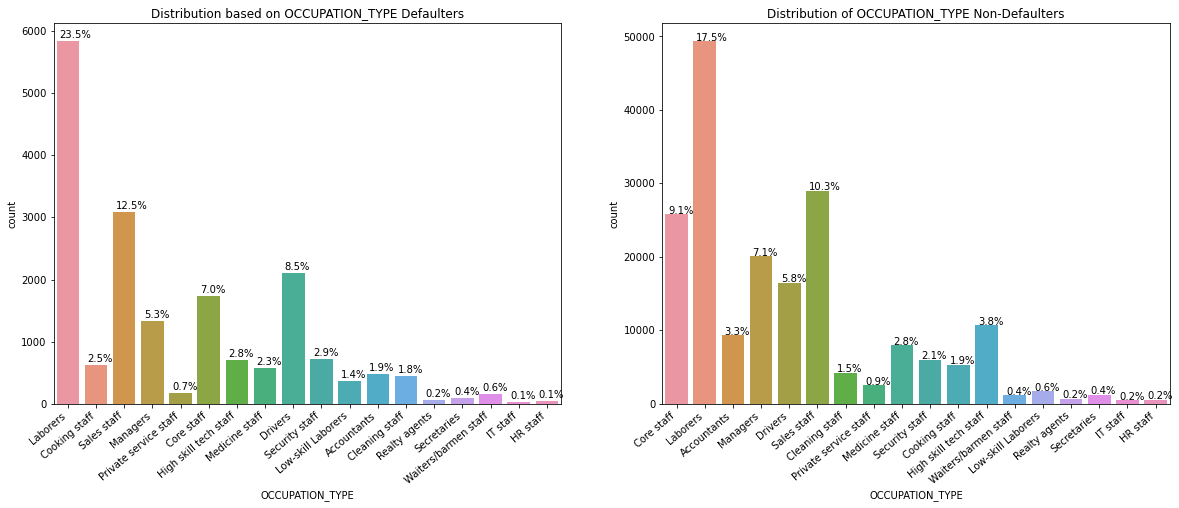

In [50]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Distribution based on OCCUPATION_TYPE Defaulters')
TARGET_OCCUPATION_TYPE_DEFAULTERS= sns.countplot(x='OCCUPATION_TYPE',data=Analysis_df1)
TARGET_OCCUPATION_TYPE_DEFAULTERS.set_xticklabels(TARGET_OCCUPATION_TYPE_DEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_OCCUPATION_TYPE_DEFAULTERS.patches:
   TARGET_OCCUPATION_TYPE_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of OCCUPATION_TYPE Non-Defaulters')
TARGET_OCCUPATION_TYPE_NDEFAULTERS = sns.countplot(x='OCCUPATION_TYPE',data=Analysis_df0)
TARGET_OCCUPATION_TYPE_NDEFAULTERS.set_xticklabels(TARGET_OCCUPATION_TYPE_NDEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_OCCUPATION_TYPE_NDEFAULTERS.patches:
   TARGET_OCCUPATION_TYPE_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Maximum number of applications are from  Laborers(Occupation_Type)  in both defaulters and non-defaulters.

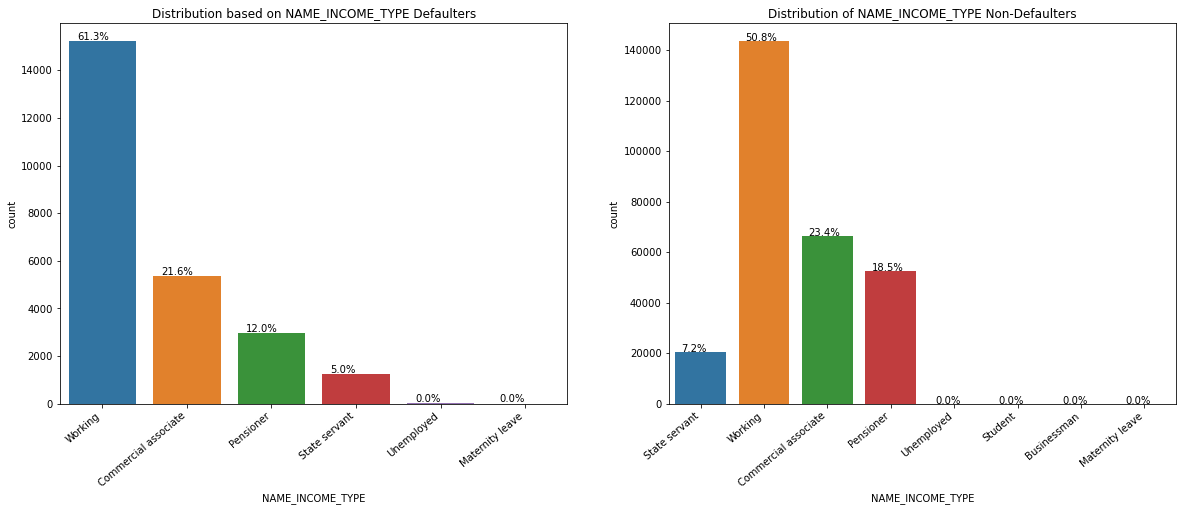

In [51]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Distribution based on NAME_INCOME_TYPE Defaulters')
TARGET_NAME_INCOME_TYPE_DEFAULTERS= sns.countplot(x='NAME_INCOME_TYPE',data=Analysis_df1)
TARGET_NAME_INCOME_TYPE_DEFAULTERS.set_xticklabels(TARGET_NAME_INCOME_TYPE_DEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_NAME_INCOME_TYPE_DEFAULTERS.patches:
   TARGET_NAME_INCOME_TYPE_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of NAME_INCOME_TYPE Non-Defaulters')
TARGET_NAME_INCOME_TYPE_NDEFAULTERS = sns.countplot(x='NAME_INCOME_TYPE',data=Analysis_df0)
TARGET_NAME_INCOME_TYPE_NDEFAULTERS.set_xticklabels(TARGET_NAME_INCOME_TYPE_NDEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_NAME_INCOME_TYPE_NDEFAULTERS.patches:
   TARGET_NAME_INCOME_TYPE_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Most Working Employees(Income type) applied for loans in both defaulters and non-defaulters.

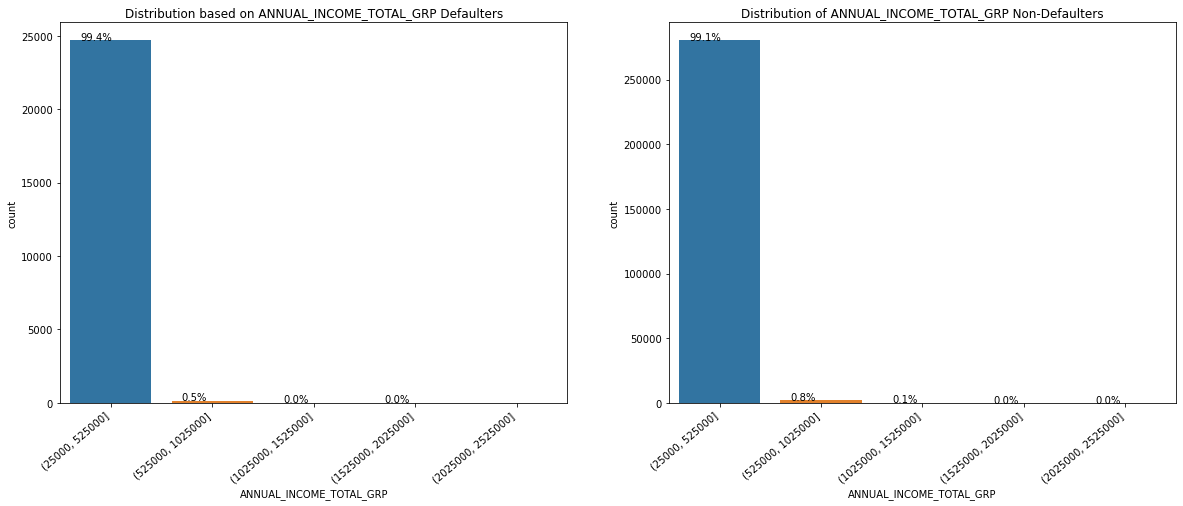

In [52]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Distribution based on ANNUAL_INCOME_TOTAL_GRP Defaulters')
TARGET_ANNUAL_INCOME_TOTAL_GRP_DEFAULTERS= sns.countplot(x='ANNUAL_INCOME_TOTAL_GRP',data=Analysis_df1)
TARGET_ANNUAL_INCOME_TOTAL_GRP_DEFAULTERS.set_xticklabels(TARGET_ANNUAL_INCOME_TOTAL_GRP_DEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_ANNUAL_INCOME_TOTAL_GRP_DEFAULTERS.patches:
   TARGET_ANNUAL_INCOME_TOTAL_GRP_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of ANNUAL_INCOME_TOTAL_GRP Non-Defaulters')
TARGET_ANNUAL_INCOME_TOTAL_GRP_NDEFAULTERS= sns.countplot(x='ANNUAL_INCOME_TOTAL_GRP',data=Analysis_df0)
TARGET_ANNUAL_INCOME_TOTAL_GRP_NDEFAULTERS.set_xticklabels(TARGET_ANNUAL_INCOME_TOTAL_GRP_NDEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_ANNUAL_INCOME_TOTAL_GRP_NDEFAULTERS.patches:
   TARGET_ANNUAL_INCOME_TOTAL_GRP_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))

plt.show()

- Here we can conclude that most of the people with an annual income of less than 5,00,000 is applying for loan more when compare to the annual income grater than 5,00,000 in both defaulted and non-defaulted cases.

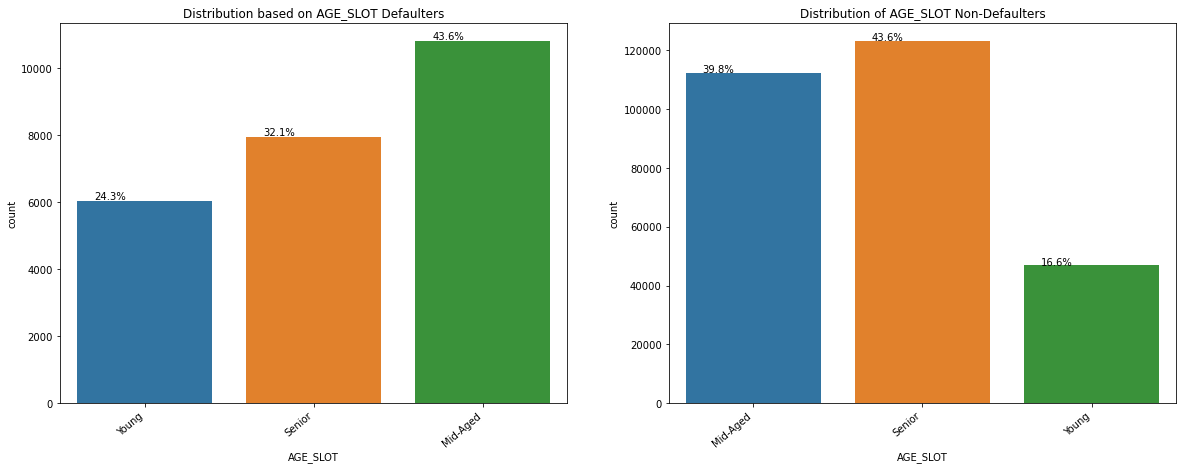

In [53]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Distribution based on AGE_SLOT Defaulters')
TARGET_AGE_SLOT_DEFAULTERS= sns.countplot(x='AGE_SLOT',data=Analysis_df1)
TARGET_AGE_SLOT_DEFAULTERS.set_xticklabels(TARGET_AGE_SLOT_DEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_AGE_SLOT_DEFAULTERS.patches:
   TARGET_AGE_SLOT_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of AGE_SLOT Non-Defaulters')
TARGET_AGE_SLOT_NDEFAULTERS= sns.countplot(x='AGE_SLOT',data=Analysis_df0)
TARGET_AGE_SLOT_NDEFAULTERS.set_xticklabels(TARGET_AGE_SLOT_NDEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_AGE_SLOT_NDEFAULTERS.patches:
   TARGET_AGE_SLOT_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))

plt.show()

When we compare defaulted and non-defaulted:
- Most of the defaulters who applies for loan comes under the AGE_SLOT Mid-Aged(which is between (30-45)).
- Most of the non-defaulters who applies for loan comes under the AGE_SLOT Senior( aged above 45).


### Univariate Continuous Analysis

In [54]:

def plotunivariate(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
    
    sns.distplot(a=Analysis_df0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=12)
            
    sns.distplot(a=Analysis_df1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=12)    
        
    plt.show()

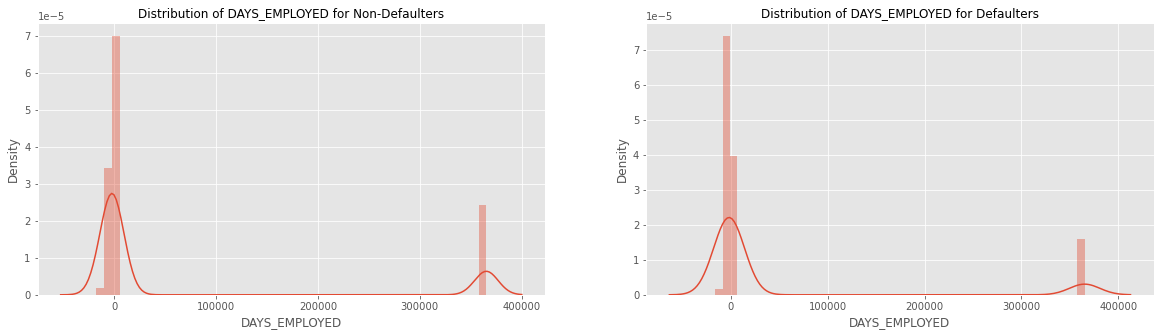

In [55]:
plotunivariate('DAYS_EMPLOYED')

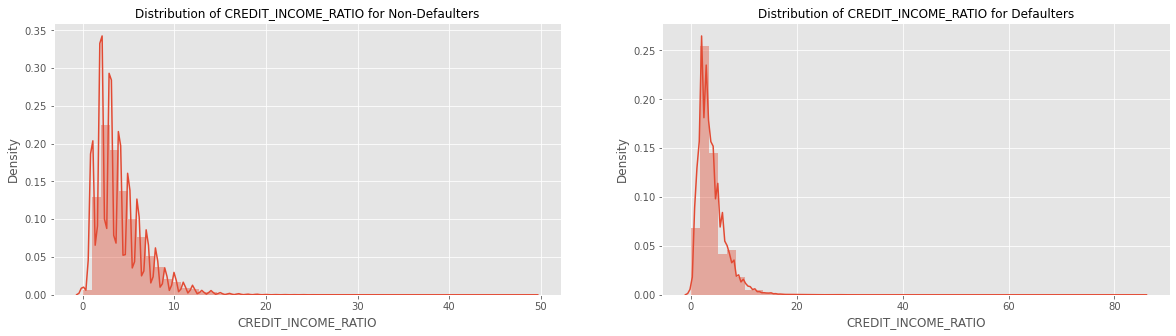

In [56]:
plotunivariate('CREDIT_INCOME_RATIO')

CREDIT_INCOME_RATIO = AMT_CREDIT/AMT_INCOME_TOTAL.

As we can see that the density of the credit income ratio ismore than 50.



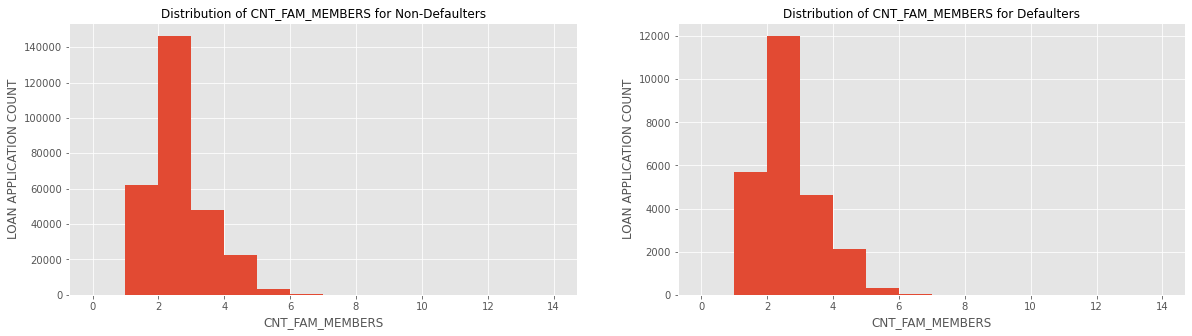

In [57]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
Analysis_df0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=12)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
Analysis_df1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=12)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

From the above graph we can conclude that, Family having 3 members apply more for the Loan 


### Correlation check in Analysis_df0  and Analysis_df1 dataset

In [89]:
correlation0=Analysis_df0.corr()
correlation_df0 = correlation0.where(np.triu(np.ones(correlation0.shape),k=1).astype(np.bool)).unstack().reset_index()
correlation_df0.columns=['Column1','Column2','Correlation']
correlation_df0.dropna(subset=['Correlation'],inplace=True)
correlation_df0['Abs_Correlation']=correlation_df0['Correlation'].abs()
correlation_df0 = correlation_df0.sort_values(by=['Abs_Correlation'], ascending=False)
correlation_df0.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999758,0.999758
468,AGE,DAYS_BIRTH,-0.999711,0.999711
142,AMT_GOODS_PRICE,AMT_CREDIT,0.987024,0.987024
416,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878569,0.878569
143,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421,0.776421
119,AMT_ANNUITY,AMT_CREDIT,0.771296,0.771296
510,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589,0.648589
512,CREDIT_INCOME_RATIO,AMT_GOODS_PRICE,0.628732,0.628732
307,FLAG_EMP_PHONE,DAYS_BIRTH,0.622076,0.622076
473,AGE,FLAG_EMP_PHONE,-0.622022,0.622022


In [90]:
correlation1=Analysis_df1.corr()
correlation_df1 = correlation1.where(np.triu(np.ones(correlation1.shape),k=1).astype(np.bool)).unstack().reset_index()
correlation_df1.columns=['Column1','Column2','Correlation']
correlation_df1.dropna(subset=['Correlation'],inplace=True)
correlation_df1['Abs_Correlation']=correlation_df1['Correlation'].abs()
correlation_df1 = correlation_df1.sort_values(by=['Abs_Correlation'], ascending=False)
correlation_df1.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999702,0.999702
468,AGE,DAYS_BIRTH,-0.999691,0.999691
142,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
416,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
143,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
119,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
510,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
512,CREDIT_INCOME_RATIO,AMT_GOODS_PRICE,0.623100,0.623100
473,AGE,FLAG_EMP_PHONE,-0.578643,0.578643
307,FLAG_EMP_PHONE,DAYS_BIRTH,0.578519,0.578519


In [60]:
def targets_corrilation(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

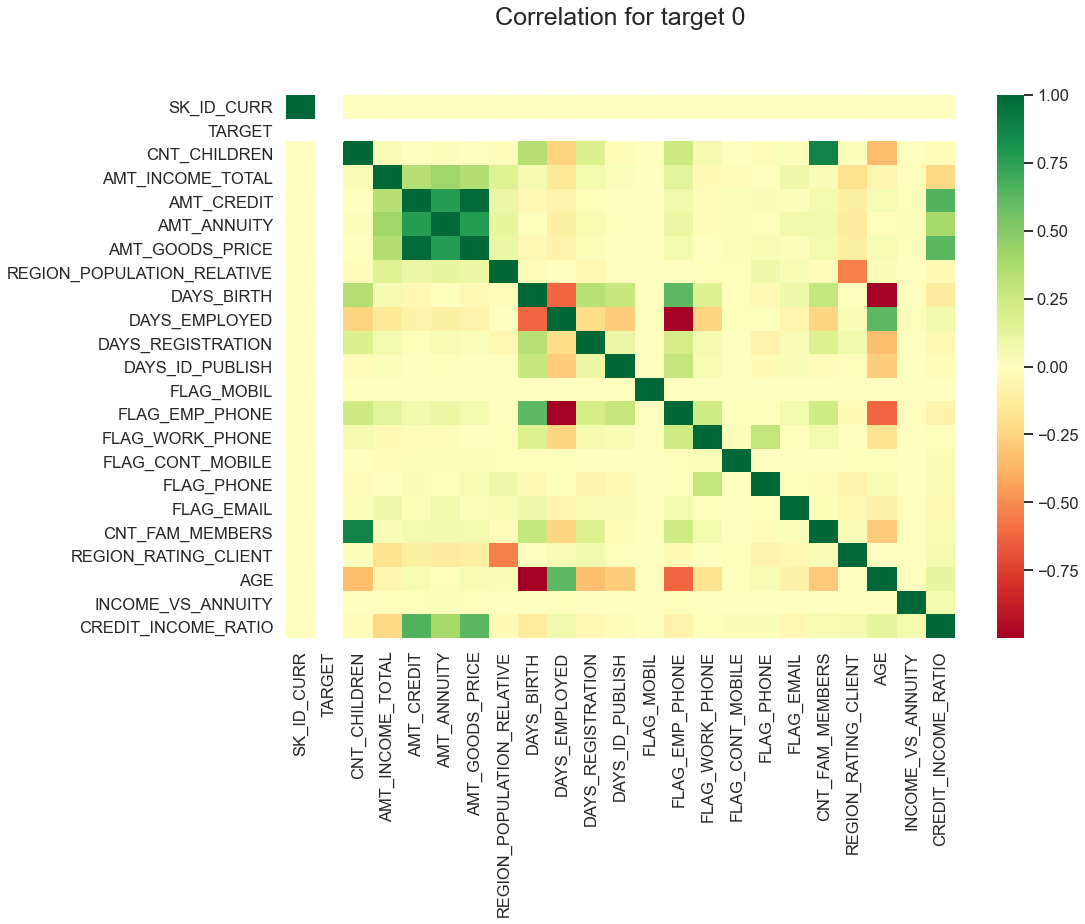

In [92]:
targets_corrilation(data=correlation0,title='Correlation for target 0')

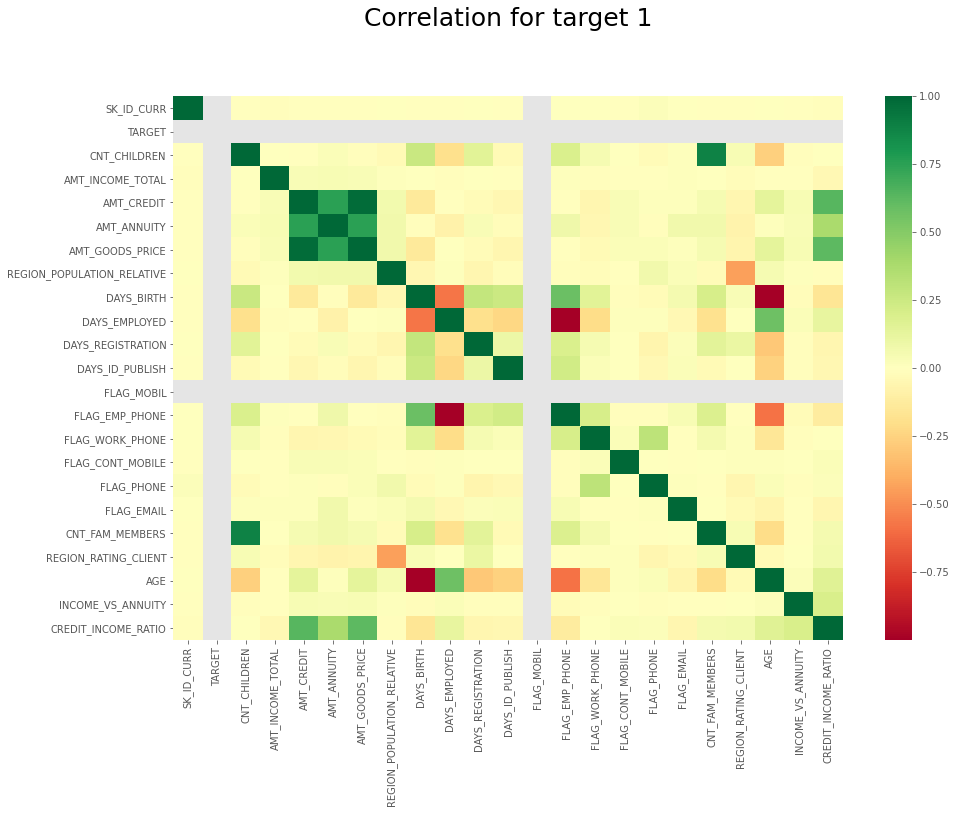

In [62]:
targets_corrilation(data=correlation1,title='Correlation for target 1')

There are number of observation we can point out

1-Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2-Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3-Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4-Credit amount is higher to densely populated area.
5-The income is also higher in densely populated area.

### Bivariate Analysis of numerical variables

In [63]:
def plotbivariate(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=Analysis_df0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=12)
    
    sns.scatterplot(x=var1, y=var2,data=Analysis_df1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=12)
            
    plt.show()

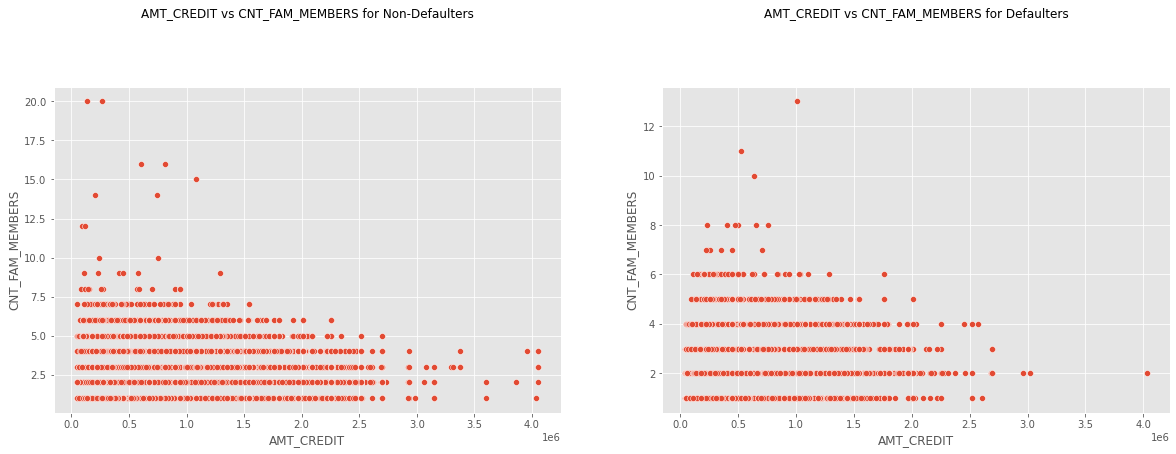

In [64]:
plotbivariate('AMT_CREDIT','CNT_FAM_MEMBERS')

We can conclude that when the number of members increases the credit amount decreases

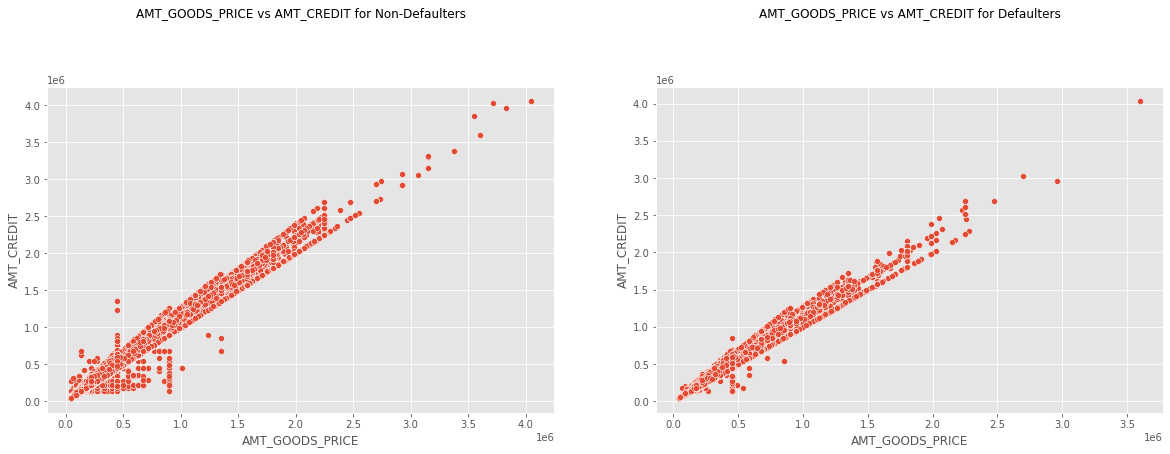

In [65]:
plotbivariate('AMT_GOODS_PRICE','AMT_CREDIT')

Amount of credit increases with amount of goods price.

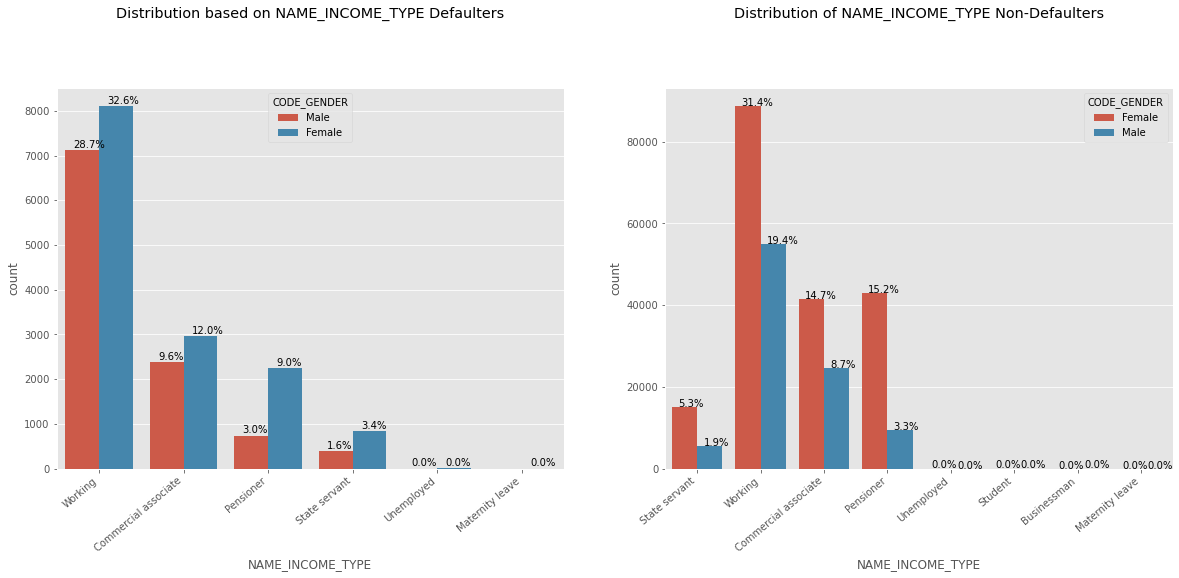

In [66]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Distribution based on NAME_INCOME_TYPE Defaulters')
TARGET_NAME_INCOME_TYPE_DEFAULTERS= sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=Analysis_df1)
TARGET_NAME_INCOME_TYPE_DEFAULTERS.set_xticklabels(TARGET_NAME_INCOME_TYPE_DEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_NAME_INCOME_TYPE_DEFAULTERS.patches:
   TARGET_NAME_INCOME_TYPE_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(1,2,2)
plt.title('Distribution of NAME_INCOME_TYPE Non-Defaulters')
TARGET_NAME_INCOME_TYPE_NDEFAULTERS = sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=Analysis_df0)
TARGET_NAME_INCOME_TYPE_NDEFAULTERS.set_xticklabels(TARGET_NAME_INCOME_TYPE_NDEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_NAME_INCOME_TYPE_NDEFAULTERS.patches:
   TARGET_NAME_INCOME_TYPE_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Points to be concluded from the above graph for Target=0 (Non-Defaulters).
1. Female are having more credit than males
2. High number of credit for income type working , commercial associate , pensioner and state servant
3. Low number of credit for income type student ,unemployed, businessman and maternity leave

Inference:
Points to be concluded from the above graph for Target=1 (Defaulters).
1. High number of credit for income type working , commercial associate , pensioner and state servant.Same as of target0
2. Low number of credit for income type unemployed and maternity leave

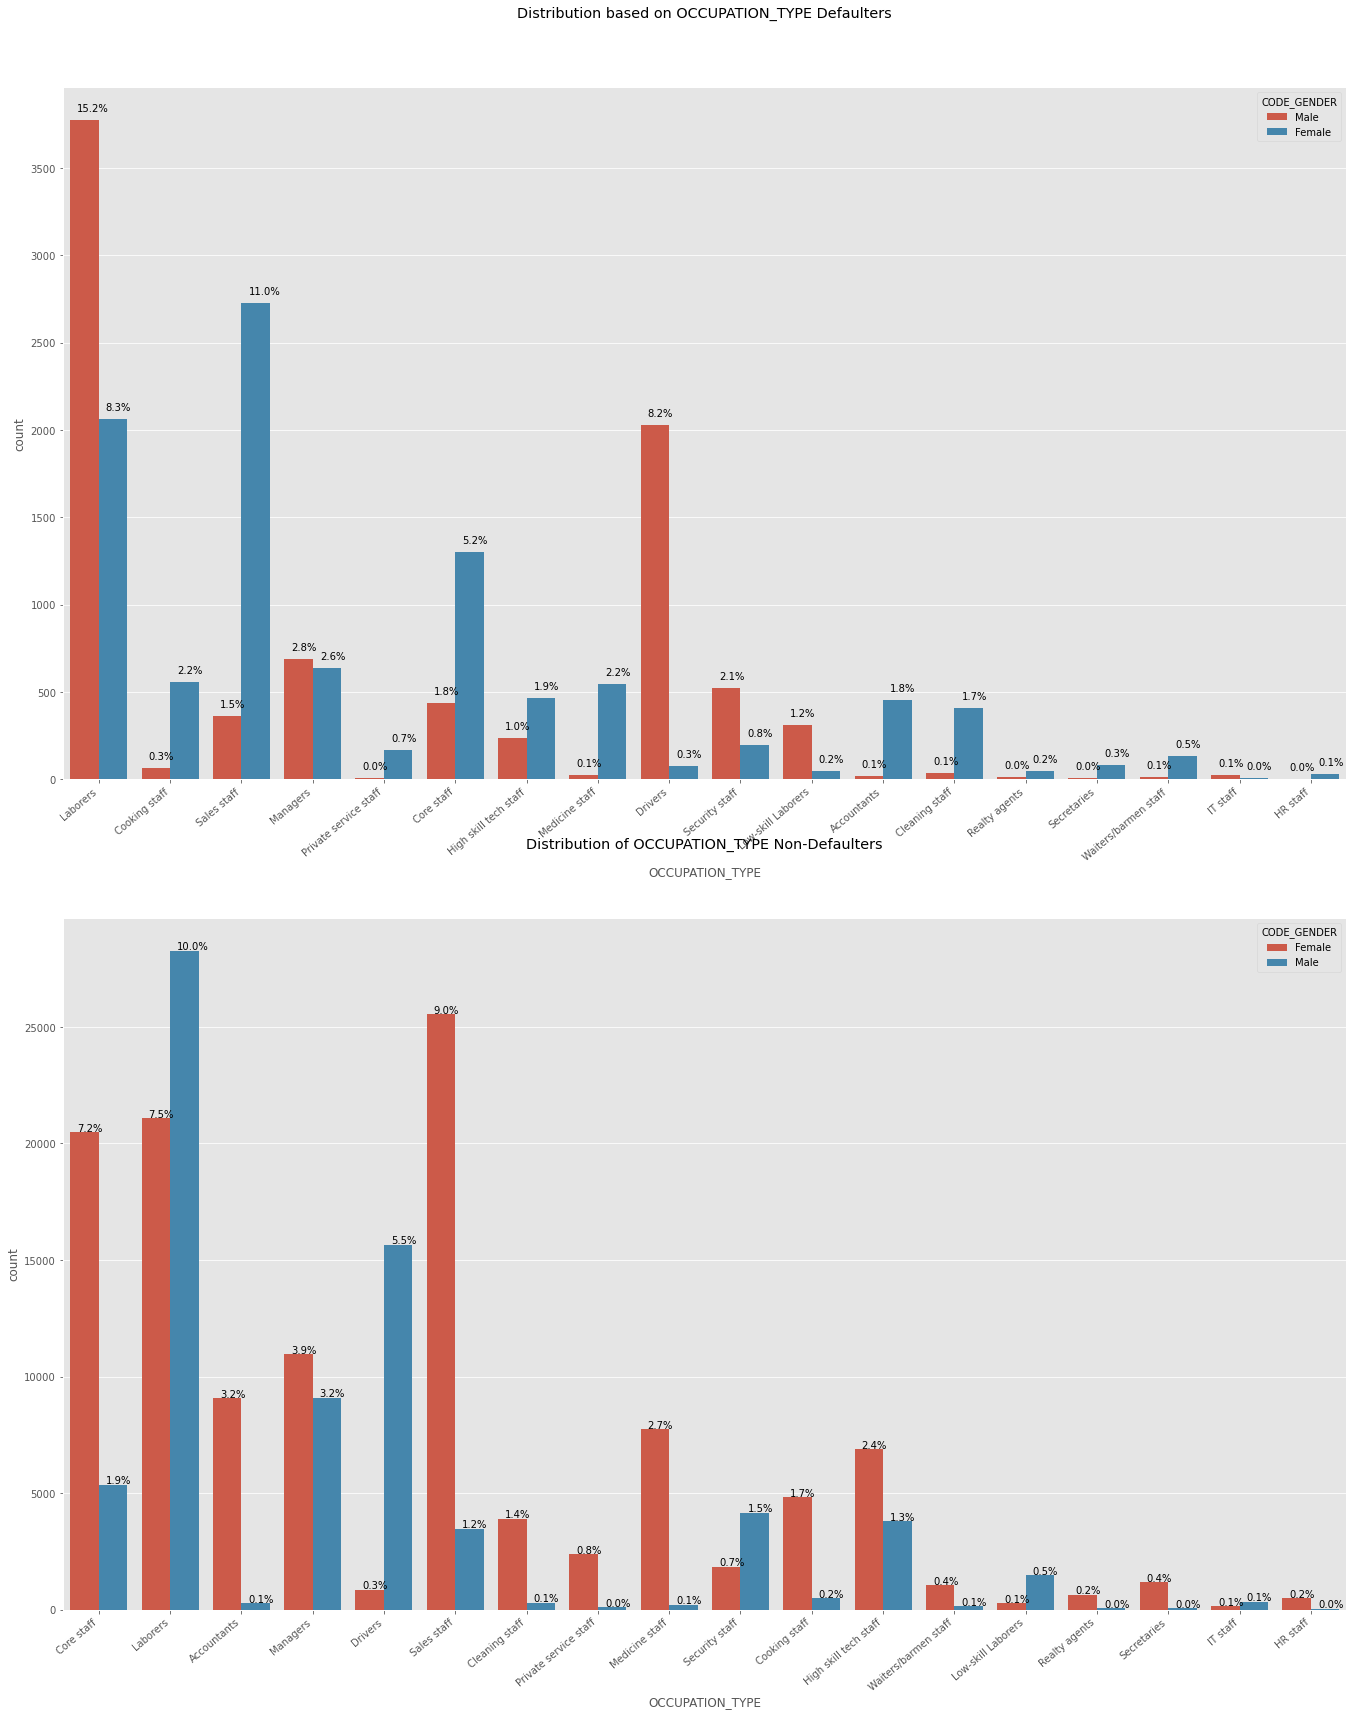

In [67]:
plt.figure(figsize=(23,28))
plt.subplot(2,1,1)
plt.title('Distribution based on OCCUPATION_TYPE Defaulters')
TARGET_OCCUPATION_TYPE_DEFAULTERS= sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=Analysis_df1)
TARGET_OCCUPATION_TYPE_DEFAULTERS.set_xticklabels(TARGET_OCCUPATION_TYPE_DEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_OCCUPATION_TYPE_DEFAULTERS.patches:
   TARGET_OCCUPATION_TYPE_DEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df1))*100), (p.get_x()+0.1, p.get_height()+50))
plt.subplot(2,1,2)
plt.title('Distribution of OCCUPATION_TYPE Non-Defaulters')
TARGET_OCCUPATION_TYPE_NDEFAULTERS = sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=Analysis_df0)
TARGET_OCCUPATION_TYPE_NDEFAULTERS.set_xticklabels(TARGET_OCCUPATION_TYPE_NDEFAULTERS.get_xticklabels(), rotation=40, ha="right")
for p in TARGET_OCCUPATION_TYPE_NDEFAULTERS.patches:
   TARGET_OCCUPATION_TYPE_NDEFAULTERS.annotate('{:.1f}%'.format((p.get_height()/len(Analysis_df0))*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

Inference:

From the above graph we can say that in both Defaulter and non-defaulters the males who applied for Credits are having occupation type as Laborers and most of the female who applied for credits have a occupation type as Sales Type.

In [68]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
PreviousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [70]:
PreviousApplication.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [71]:
PreviousApplication.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [72]:
PreviousApplication = PreviousApplication.loc[:,PreviousApplication.isnull().mean()<=0.5]
PreviousApplication.shape

(1670214, 33)

In [73]:
def plot_univariate(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(20,5))
    
    sns.countplot(x=var, data=PreviousApplication,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
    
    plt.show()

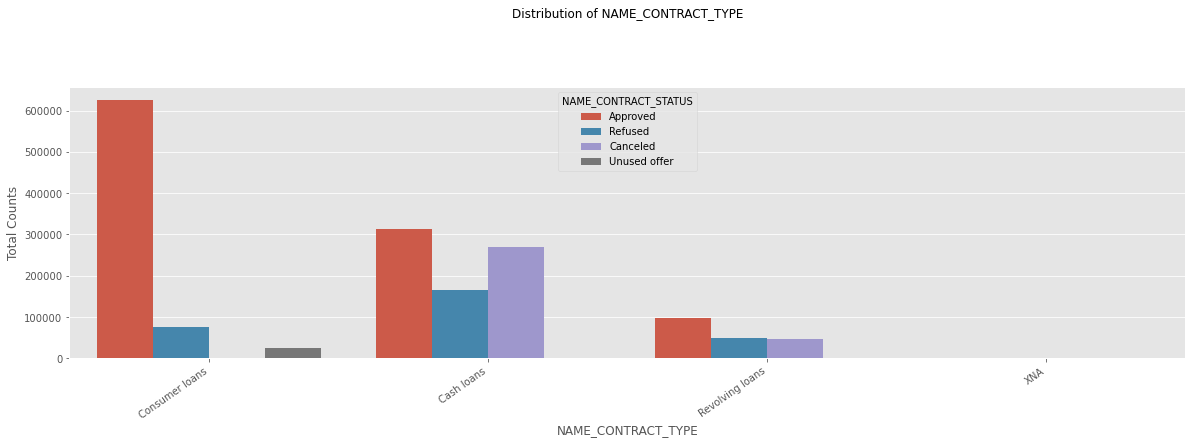

In [74]:
plot_univariate('NAME_CONTRACT_TYPE')

From the grpah we can conclude that most of the application is for Consumer loans and Cash loans, in which most of the cash loans got cancelled when compared to Consumer loans

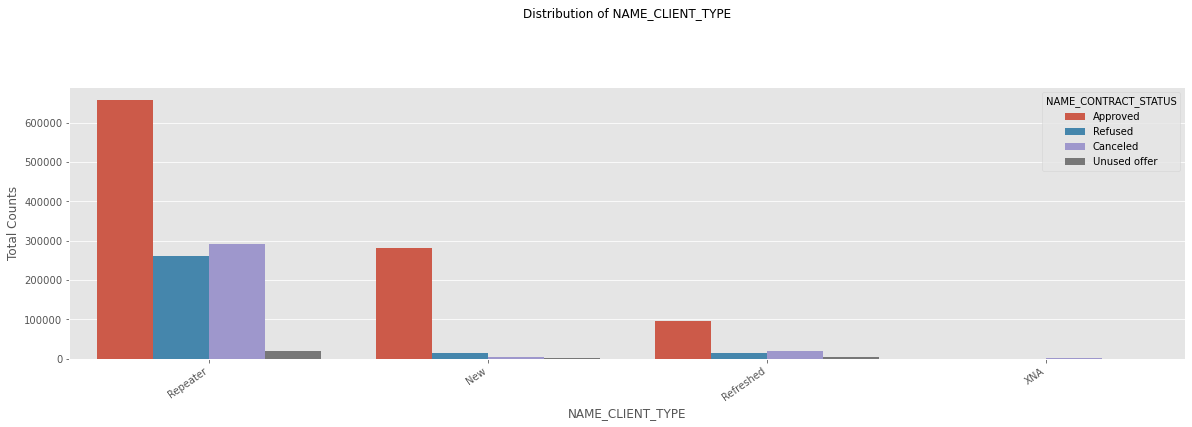

In [75]:
plot_univariate('NAME_CLIENT_TYPE')

- We can analysis that most of the loan applications are from repeat customers, 
- Out of the total applications more than 60%-70% of customers are repeaters. 
- They also get refused most often.

#### Checking the correlation in the PreviousApplication dataset

In [76]:
correlation = PreviousApplication.corr()
correlation_df = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
correlation_df.columns=['Column1','Column2','Correlation']
correlation_df.dropna(subset=['Correlation'],inplace=True)
correlation_df['Abs_Correlation']=correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by=['Abs_Correlation'], ascending=False)
correlation_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


####  plotting the relation between  highly correlated numeric variables.

<Figure size 1296x576 with 0 Axes>

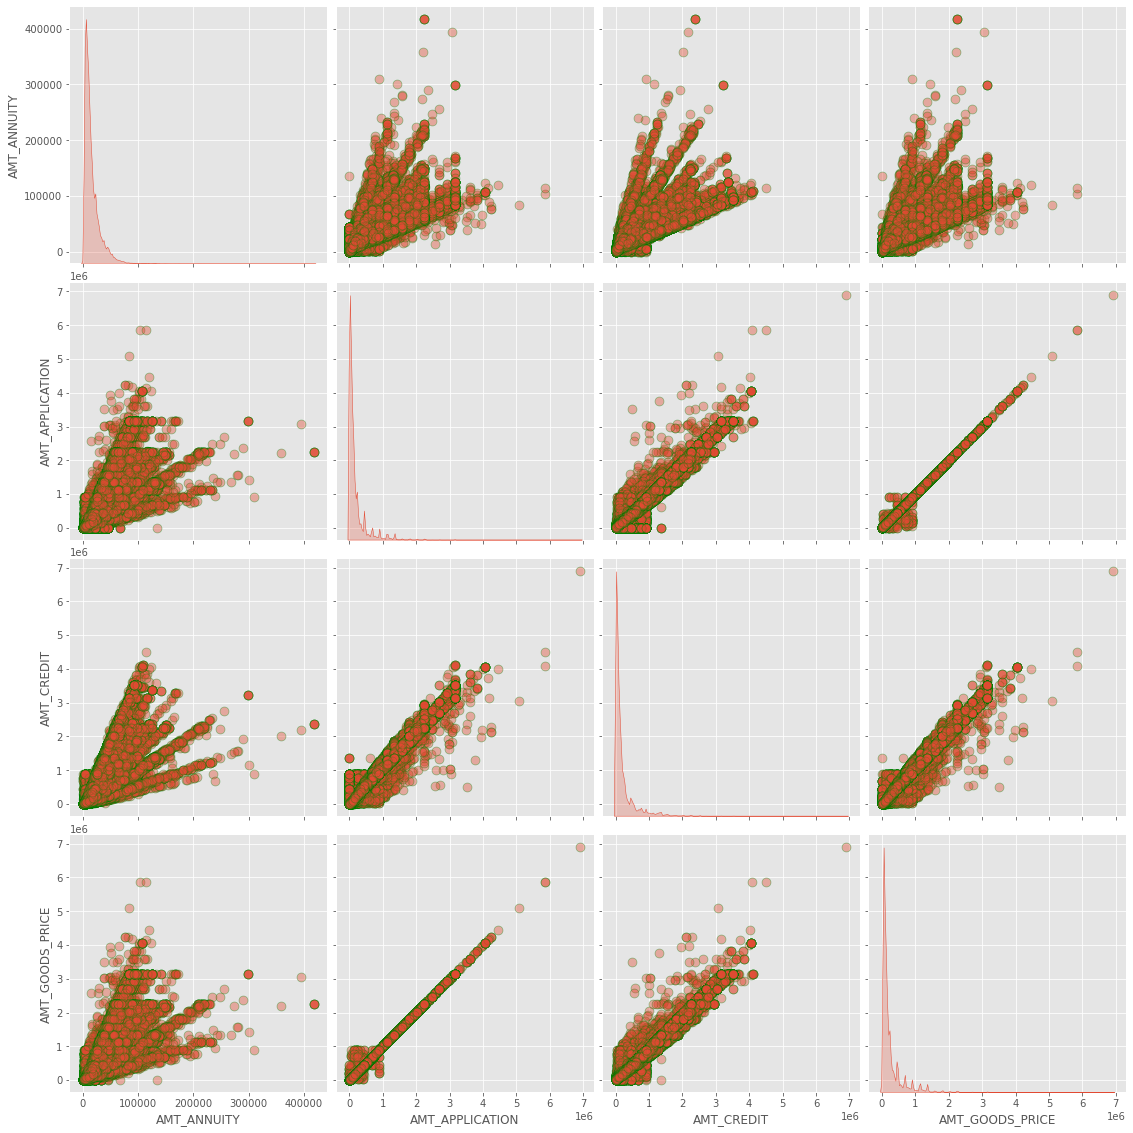

In [77]:

plt.figure(figsize=[18,8])
sns.pairplot(PreviousApplication[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'g'},
             size = 4)
plt.show()

Annuity of previous application has a very high and positive supremacy on below components:
1. How much credit did client asked on the previous application
2. Final credit amount on the previous application that was approved by the bank
3. Goods price of good that client asked for on the previous application

In [78]:
Final_Application_data = pd.merge(Analysis_df, PreviousApplication, how='left', on=['SK_ID_CURR'])

In [79]:
Final_Application_data.shape

(1430100, 69)

In [80]:
Final_Application_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 69 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430100 non-null  int64   
 1   TARGET                       1430100 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430100 non-null  object  
 3   CODE_GENDER                  1430100 non-null  object  
 4   FLAG_OWN_CAR                 1430100 non-null  object  
 5   FLAG_OWN_REALTY              1430100 non-null  object  
 6   CNT_CHILDREN                 1430100 non-null  int64   
 7   AMT_INCOME_TOTAL             1430100 non-null  float64 
 8   AMT_CREDIT_x                 1430100 non-null  float64 
 9   AMT_ANNUITY_x                1430100 non-null  float64 
 10  AMT_GOODS_PRICE_x            1430100 non-null  float64 
 11  NAME_TYPE_SUITE_x            1430100 non-null  object  
 12  NAME_INCOME_TYPE            

In [81]:
def plotbivariate_combined(Varx,Vary):
    
    plt.style.use('ggplot')
    sns.despine
    NewData = Final_Application_data.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewData=NewData.div(NewData.sum(axis=1),axis='rows')*100
    sns.set()
    NewData.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

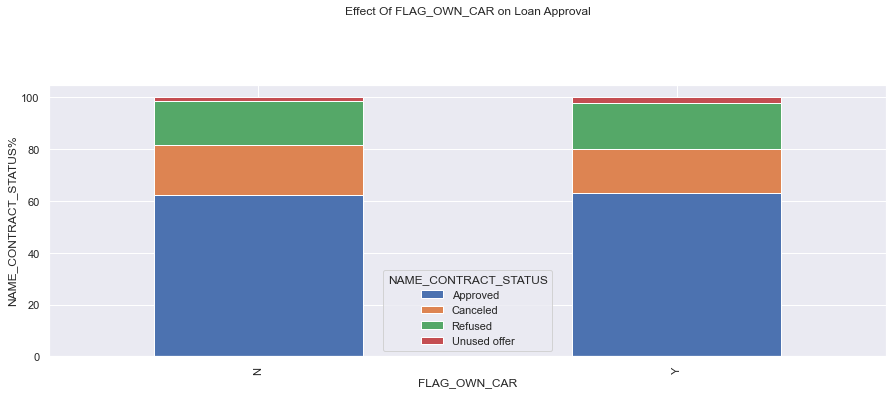

In [82]:
plotbivariate_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We can conclude that having a car also not affect the approval or rejection of the loan. But from the univariate graph we found having a car reduce the chance of getting defaulted.

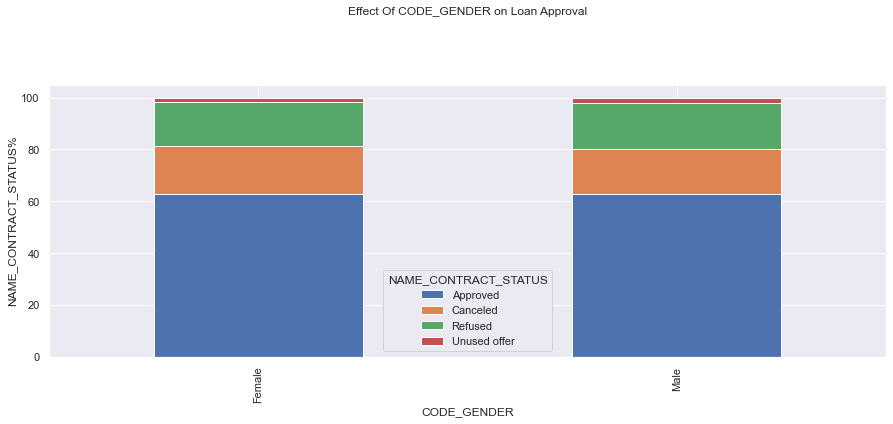

In [83]:
plotbivariate_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

We can't find any differnece in the acceptance and rejection of loan based on Gender.
But from the above univariate graph we found female have less chance to become defaulters compare to male.

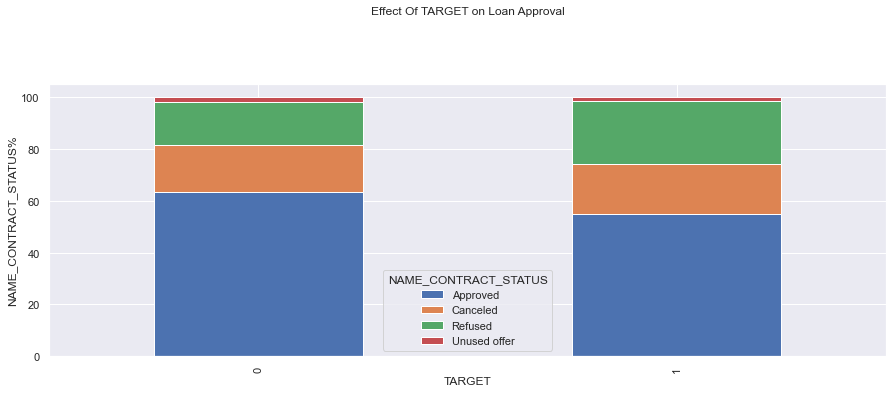

In [84]:
plotbivariate_combined('TARGET','NAME_CONTRACT_STATUS')



We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting

In [85]:
def plotbivariate_map(Varx,Vary):
    plt.figure(figsize=[12,9])
    plt.style.use('ggplot')
    sns.despine
    NewData = Final_Application_data.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewData=NewData.div(NewData.sum(axis=1),axis='rows')*100
    sns.set()
    sns.heatmap(NewData,annot=True, cmap="RdYlGn")
    plt.title(f'Effect Of {Varx} on Loan Approval in Percentage')
    plt.xlabel(f'{Varx}%')
    plt.ylabel(f'{Vary}%')
    plt.show()

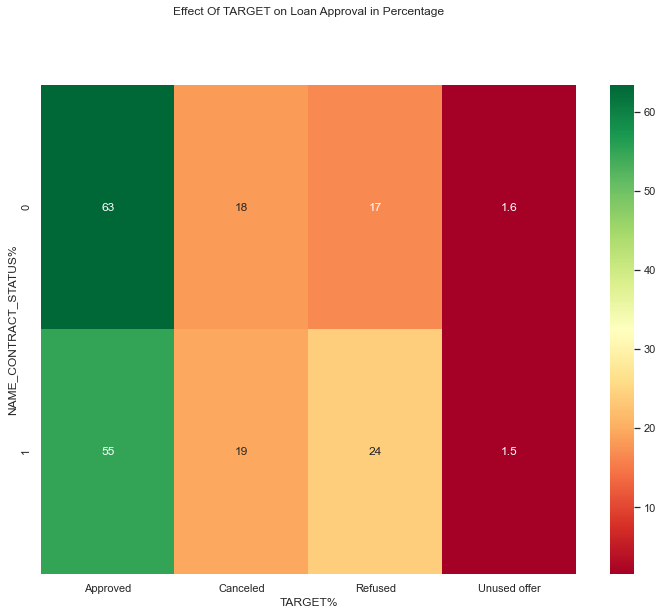

In [86]:
plotbivariate_map('TARGET','NAME_CONTRACT_STATUS')


Inference :
From the above heatmap and bar graph with respect to Target varlue, we can conclude that:

-  non-defaulted people have more approved loans than defaulted people.
- For Both the Defaulted and non-defaulted the percentage of people who cancelled and unused their loans in between the process seems to be same.
- Most of the defaulted people got rejected to get the loan it shows they doesnot meet their requirement when we compare with non-defaulted people.



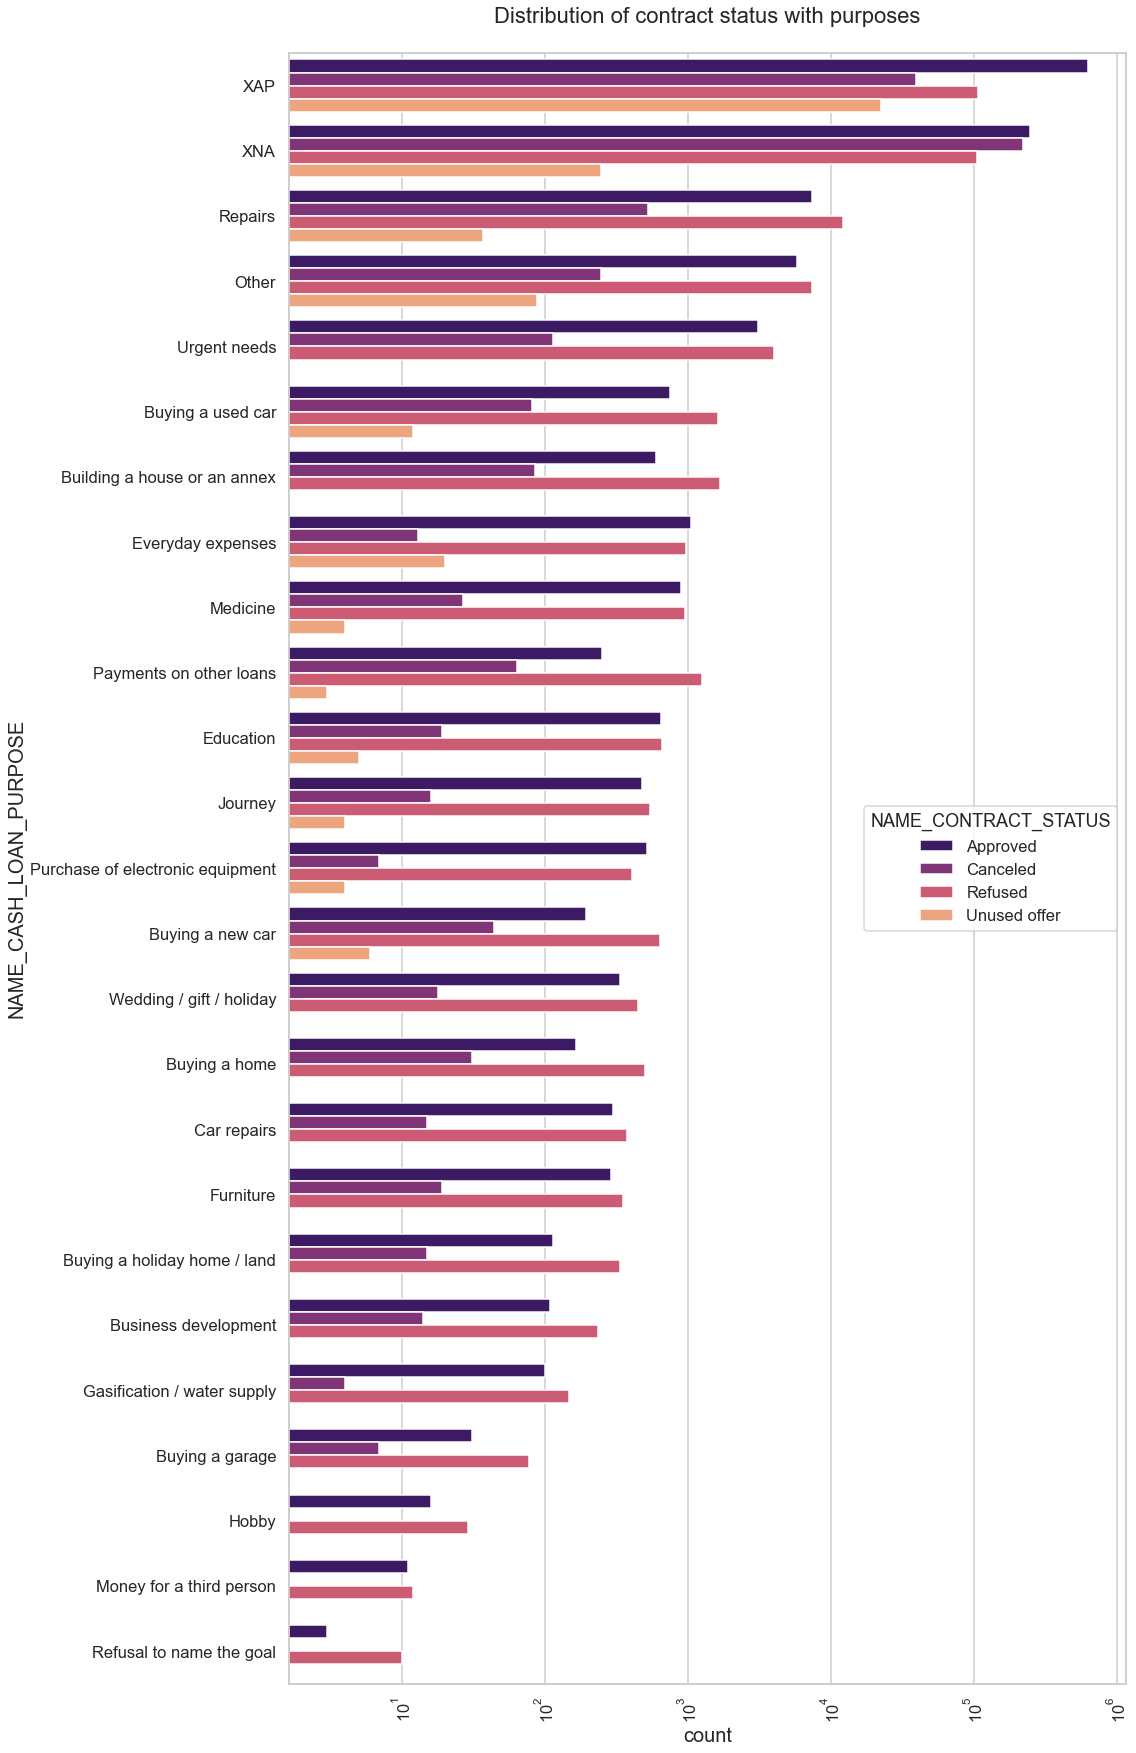

In [87]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = Final_Application_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=Final_Application_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.
For education purposes we have equal number of approves and rejection
Payign other loans and buying a new car is having significant higher rejection than approves.